# Detección de Idiomas - Logistic Regression

### Importar librerías

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Cargar el dataset

In [35]:
df = pd.read_csv("../dataset/updated_language_detection.csv")
df.describe()

,Text,Language
count,19813,19813
unique,19813,20
top,aprilie sonda spațială messenger a nasa și-a ...,Thai
freq,1,1000


### Dividir el dataset en conjuntos de entrenamiento y prueba

Se utiliza stratify para mantener la proporción de clases en los conjuntos de entrenamiento y prueba.

In [14]:
X = df['Text']
y = df['Language']

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Language'], test_size=0.2, random_state=42, stratify=df['Language'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15856,), (3965,), (15856,), (3965,))

### Convertir texto a Bag of Words

In [15]:
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

### Entrenar el modelo

In [16]:
lr_model = LogisticRegression(max_iter=1000, solver='lbfgs')
lr_model.fit(X_train_bow, y_train)

LogisticRegression(max_iter=1000)

In [25]:
print(f"El modelo tiene {lr_model.coef_.shape[1]} términos.")

El modelo tiene 206865 términos.


### Evaluar el modelo

In [17]:
y_pred_train = lr_model.predict(X_train_bow)
y_pred_test = lr_model.predict(X_test_bow)

print("Accuracy en conjunto de entrenamiento:", accuracy_score(y_train, y_pred_train))
print("Accuracy en conjunto de prueba:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Accuracy en conjunto de entrenamiento: 0.999558526740666
Accuracy en conjunto de prueba: 0.9899117276166457

Classification Report:
               precision    recall  f1-score   support

      Arabic       1.00      0.98      0.99       199
       Dutch       1.00      0.99      1.00       199
     English       0.98      0.99      0.99       200
    Estonian       0.98      0.98      0.98       200
      French       0.99      0.98      0.99       198
       Hindi       1.00      0.99      1.00       197
  Indonesian       0.99      0.98      0.99       194
      Korean       1.00      0.99      1.00       200
       Latin       0.98      0.98      0.98       190
     Persian       1.00      1.00      1.00       200
   Portugese       0.98      0.99      0.99       199
      Pushto       1.00      0.99      1.00       197
    Romanian       0.99      0.99      0.99       200
     Russian       0.91      1.00      0.95       200
     Spanish       0.99      0.97      0.98       199
  

#### Reporte de Clasificación

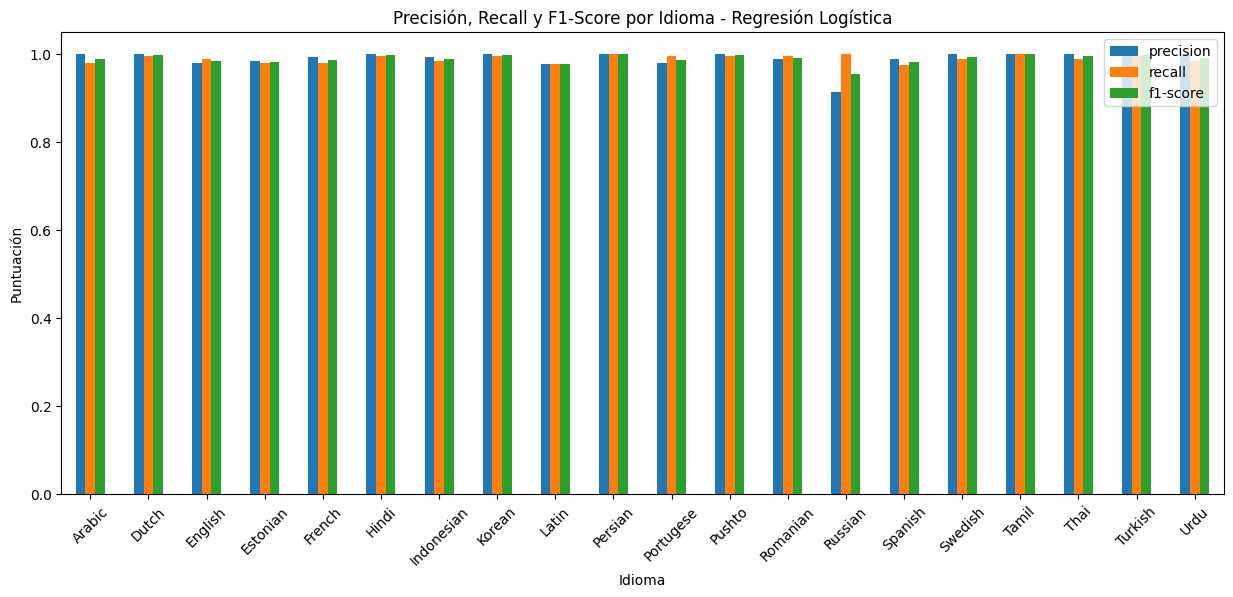

In [18]:
report_dict = classification_report(y_test, y_pred_test, output_dict=True)
report_df = pd.DataFrame(report_dict).T[:-3]

report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(15, 6))
plt.title("Precisión, Recall y F1-Score por Idioma - Regresión Logística")
plt.ylabel("Puntuación")
plt.xlabel("Idioma")
plt.xticks(rotation=45)
plt.savefig("../plots/lr_precision_recall_f1.png")
plt.show()

#### Precciones no acertadas

In [22]:
incorrect_predictions = []

for i in range(len(y_test)):
    if y_pred_test[i] != y_test.iloc[i]:
        incorrect_predictions.append({
            "Texto": X_test.iloc[i],
            "Predicción": y_pred_test[i],
            "Idioma Real": y_test.iloc[i]
        })

df = pd.DataFrame(incorrect_predictions)
df.to_csv('../results/lr_incorrect_predictions.csv', index=False, encoding='utf-8')

#### Matriz de Confusión

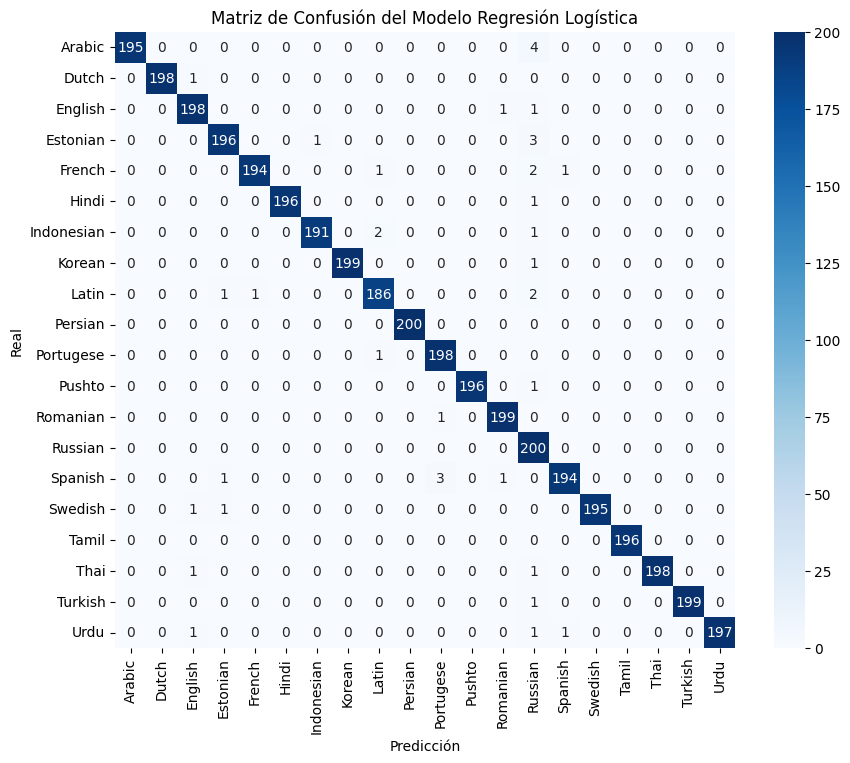

In [20]:
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.title("Matriz de Confusión del Modelo Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.savefig("../plots/lr_confusion_matrix.png")
plt.show()

### Matriz de Confusión Normalizada

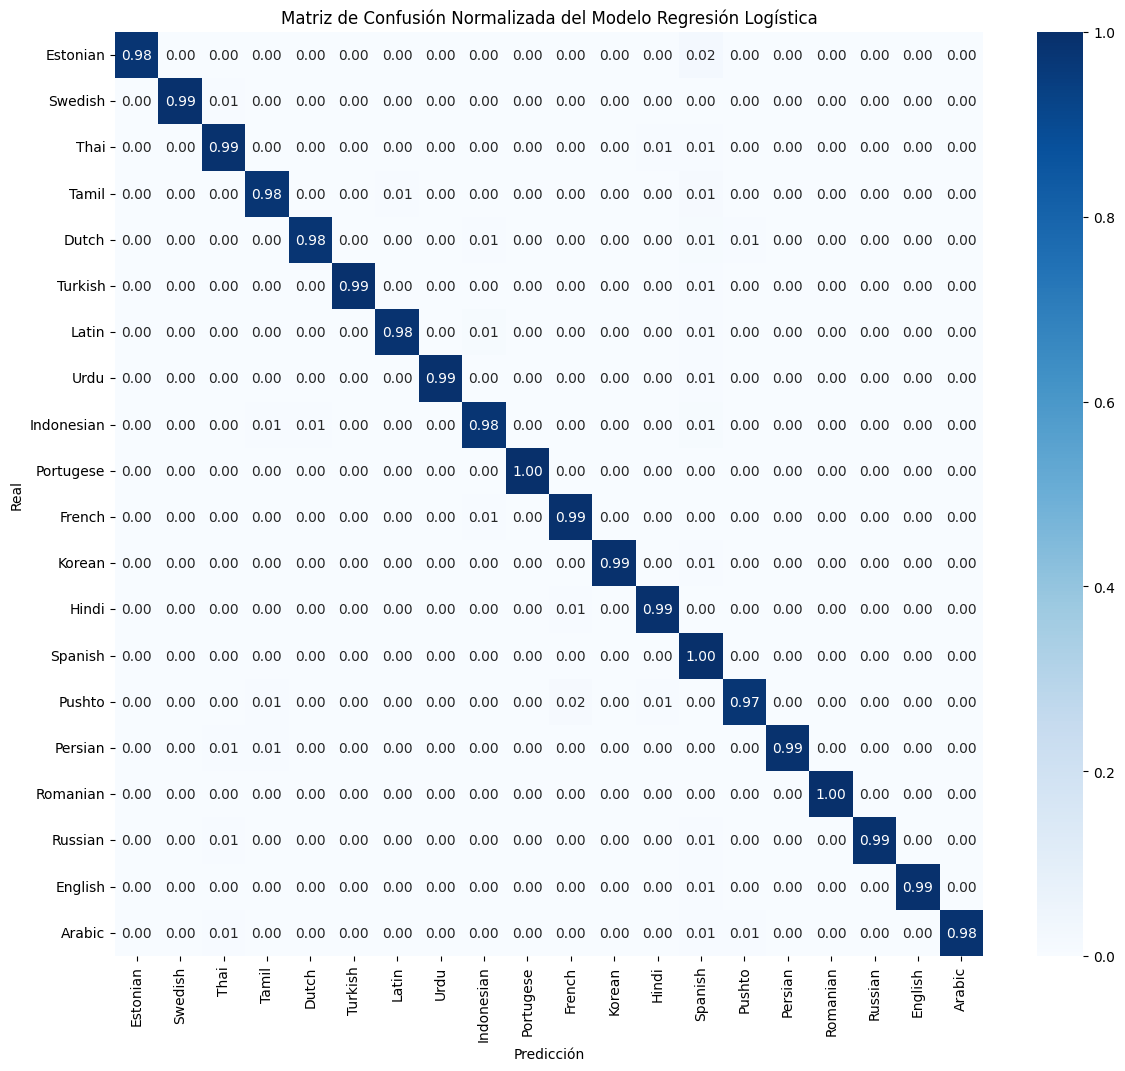

In [30]:
cm = confusion_matrix(y_test, y_pred_test, normalize='true')

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=df['Language'].unique(), yticklabels=df['Language'].unique())
plt.title("Matriz de Confusión Normalizada del Modelo Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.savefig("../plots/lr_confusion_matrix_normalized.png")
plt.show()